In [1]:
#https://www.kaggle.com/c/mlcoursemm2021/data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, ParameterGrid

In [5]:
t = pd.read_csv('train.csv')
t

,id,0,1,2,3,4,5,6,7,8,...,101,102,103,104,105,106,107,108,109,label
0,0,-4.187822,-13.978846,-246.346827,143.771285,NaN,NaN,229.360804,42.729180,68.088766,...,-61.486539,-62.615526,-67.840895,23.592680,124.809538,-23.077201,3.190311,158.660385,-83.848561,0
1,1,24.094857,-11.570042,26.793252,155.851579,89.448145,-39.356123,199.666258,95.310857,-13.326055,...,44.274265,30.681210,34.671579,66.111775,-63.125159,-43.477966,-2.787521,40.601941,-36.462574,5
2,2,129.626766,153.361044,-228.575252,-43.798189,48.125665,18.222124,NaN,12.712634,NaN,...,14.487393,-18.822421,-72.809791,-98.768014,7.588928,34.714429,76.767352,-271.184273,63.889350,4
3,3,209.960232,3.723635,134.575274,NaN,43.350338,475.118110,83.041198,-48.269179,12.554096,...,4.706411,1.643793,-15.398200,-14.028664,65.495963,-15.017345,41.329913,-1214.900271,-25.435079,1
4,4,-179.133415,NaN,-110.506442,NaN,-132.239381,78.865273,288.485620,-9.575814,-67.062730,...,-33.992316,137.368611,-33.962428,3.272204,93.822307,-168.784463,-16.651422,-80.756317,-51.105732,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,NaN,89.280447,0.558616,-80.398281,155.230419,NaN,0.901285,NaN,NaN,...,-43.625016,21.911974,-17.671641,-4.668959,-20.685668,40.392418,31.591253,-613.365860,-14.639107,1
49996,49996,-15.449821,NaN,-76.602587,NaN,-20.885585,NaN,34.354521,NaN,-10.464796,...,-79.004341,21.264265,-223.536125,7.911069,-62.884677,-65.526847,-9.959696,-37.688094,100.178277,2
49997,49997,-159.058805,-127.402034,-140.259960,-30.349701,70.529255,120.042455,207.650866,-55.420766,-56.026601,...,-48.363355,-66.722394,14.273012,97.246374,28.609078,-1.007960,-71.074378,-107.468733,111.955892,9
49998,49998,-27.407818,44.826304,NaN,-6.353477,77.512591,38.377255,NaN,NaN,-71.063387,...,-52.548998,9.162448,-24.228557,67.419780,-82.239763,40.118054,-25.954050,482.508831,-74.909144,3


In [3]:
#смотрим в каких столбцах (фичах) наны
for ind, i in enumerate(t.isnull().mean(axis=0)):
    print(ind, i, end='\t')

0 0.0	1 0.20064	2 0.19738	3 0.20032	4 0.20326	5 0.2014	6 0.1995	7 0.19986	8 0.20056	9 0.20058	10 0.199	11 0.20358	12 0.19916	13 0.19502	14 0.19944	15 0.19824	16 0.0	17 0.0	18 0.0	19 0.0	20 0.0	21 0.0	22 0.0	23 0.0	24 0.0	25 0.0	26 0.0	27 0.0	28 0.0	29 0.0	30 0.0	31 0.0	32 0.0	33 0.0	34 0.0	35 0.0	36 0.0	37 0.0	38 0.0	39 0.0	40 0.0	41 0.0	42 0.0	43 0.0	44 0.0	45 0.0	46 0.0	47 0.0	48 0.0	49 0.0	50 0.0	51 0.0	52 0.0	53 0.0	54 0.0	55 0.0	56 0.0	57 0.0	58 0.0	59 0.0	60 0.0	61 0.0	62 0.0	63 0.0	64 0.0	65 0.0	66 0.0	67 0.0	68 0.0	69 0.0	70 0.0	71 0.0	72 0.0	73 0.0	74 0.0	75 0.0	76 0.0	77 0.0	78 0.0	79 0.0	80 0.0	81 0.0	82 0.0	83 0.0	84 0.0	85 0.0	86 0.0	87 0.0	88 0.0	89 0.0	90 0.0	91 0.0	92 0.0	93 0.0	94 0.0	95 0.0	96 0.0	97 0.0	98 0.0	99 0.0	100 0.0	101 0.0	102 0.0	103 0.0	104 0.0	105 0.0	106 0.0	107 0.0	108 0.0	109 0.0	110 0.0	111 0.0	

In [4]:
#смотрим в скольких строках (записях) наны
t.dropna()

,id,0,1,2,3,4,5,6,7,8,...,101,102,103,104,105,106,107,108,109,label
39,39,-79.533250,14.281129,138.936400,49.710783,-58.784406,256.880547,24.823239,40.740447,69.777713,...,20.370896,35.363294,-77.067087,160.789637,46.294547,76.504199,36.991979,144.392323,6.316934,5
121,121,-18.077318,112.791833,-77.841071,-13.895207,75.611919,-224.798802,52.569839,40.267034,-36.337718,...,-174.044994,-101.518433,-102.894461,-19.772843,13.763638,8.320759,-109.073513,-253.812974,-101.412849,1
181,181,-74.315993,-49.609656,191.272906,81.253072,41.209992,23.324634,-246.913482,-117.572735,89.558633,...,42.657255,14.127204,-83.282656,-49.341354,94.927973,17.797748,-54.792609,190.712383,-63.236710,2
290,290,-102.538355,-31.750916,111.174415,-52.595164,-220.036179,-211.436888,-154.847046,64.898541,60.603833,...,-83.590022,-88.234084,-39.058003,-118.432948,-2.895664,-66.136821,-19.499917,796.489238,82.404635,9
357,357,191.489294,52.726538,-61.062729,-13.094133,84.705117,185.135021,252.863645,2.555338,-178.546317,...,-71.796278,-0.238719,-28.231933,107.220822,27.947423,-32.928056,116.375017,218.937540,6.851716,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49906,49906,87.373854,16.521242,165.703324,-166.861693,7.737855,388.833093,-304.240331,-33.363956,-37.830875,...,37.120916,-139.484840,41.619585,-34.921493,-58.331187,-12.864249,36.440888,253.988521,-72.212892,4
49907,49907,10.075157,15.519612,71.781120,199.488387,-14.059334,67.721903,52.981051,-65.629419,67.205918,...,-100.730056,-49.455774,39.100291,3.475093,-45.148593,-5.519630,61.112837,85.361767,44.545075,6
49940,49940,48.705125,-197.980922,94.996323,-139.276301,38.221629,43.222343,-116.142750,-76.039754,-77.376451,...,59.673313,-111.259794,-59.776266,-38.989385,127.098668,-72.429653,-52.515572,-223.547899,1.019426,4
49977,49977,244.720559,-7.501891,-193.390892,-9.081522,48.368528,143.615662,33.327474,-83.937790,-93.526403,...,-33.976222,-28.677708,-67.716495,-68.265420,-5.915925,11.604299,-108.595860,503.827004,66.710523,6


От выборки осталось 3,53% записей значит записи не трогаем, а удаляем (так проще, мб потом улучшу) 15 первых фич

In [22]:
for ind, i in enumerate(t.isnull().max(axis=0)):
    for i in t.keys()[t.isnull().max(axis=0)]:
        t = t.drop(i, axis=1)

Пытаемся обучить модель на оставшихся данных

In [7]:
X_res = np.array(t.loc[:, '15':'109'])
y_res = np.array(t.loc[:, 'label'])
result = []
param_grid = {'n_neighbors': list(range(1, 22, 3)), 'p': [1, 2], 'weights': ['uniform', 'distance']}
for params in tqdm(ParameterGrid(param_grid)):
    scores = cross_val_score(
        KNeighborsClassifier(**params, n_jobs=-1), X_res, y_res, cv=5)
    result.append([params, scores.mean()])
    print(params, scores, scores.mean())

  4%|▎         | 1/28 [01:05<29:16, 65.06s/it]

{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'} [0.0417 0.7182 0.7271 0.7217 0.7289] 0.5875199999999999


  7%|▋         | 2/28 [02:09<28:09, 64.98s/it]

{'n_neighbors': 1, 'p': 1, 'weights': 'distance'} [0.0417 0.7182 0.7271 0.7217 0.7289] 0.5875199999999999


 11%|█         | 3/28 [02:47<21:45, 52.24s/it]

{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'} [0.0413 0.7152 0.729  0.7191 0.7221] 0.5853400000000001


 14%|█▍        | 4/28 [03:22<18:15, 45.65s/it]

{'n_neighbors': 1, 'p': 2, 'weights': 'distance'} [0.0413 0.7152 0.729  0.7191 0.7221] 0.5853400000000001


 18%|█▊        | 5/28 [04:39<21:46, 56.82s/it]

{'n_neighbors': 4, 'p': 1, 'weights': 'uniform'} [0.0333 0.8637 0.8805 0.884  0.8836] 0.70902


 21%|██▏       | 6/28 [05:54<23:07, 63.06s/it]

{'n_neighbors': 4, 'p': 1, 'weights': 'distance'} [0.0347 0.8022 0.8139 0.8102 0.8131] 0.65482


 25%|██▌       | 7/28 [06:44<20:38, 58.96s/it]

{'n_neighbors': 4, 'p': 2, 'weights': 'uniform'} [0.0333 0.8665 0.8887 0.8778 0.8914] 0.7115400000000001


 29%|██▊       | 8/28 [07:33<18:34, 55.70s/it]

{'n_neighbors': 4, 'p': 2, 'weights': 'distance'} [0.0342 0.805  0.8175 0.8051 0.8149] 0.65534


 32%|███▏      | 9/28 [08:50<19:46, 62.44s/it]

{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'} [0.035  0.8689 0.888  0.8949 0.885 ] 0.7143599999999999


 36%|███▌      | 10/28 [10:06<19:54, 66.36s/it]

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'} [0.0353 0.8698 0.8872 0.8945 0.8851] 0.71438


 39%|███▉      | 11/28 [10:59<17:39, 62.30s/it]

{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'} [0.0347 0.8733 0.8936 0.8897 0.8899] 0.71624


 43%|████▎     | 12/28 [11:50<15:45, 59.10s/it]

{'n_neighbors': 7, 'p': 2, 'weights': 'distance'} [0.0348 0.8722 0.8932 0.8885 0.8872] 0.7151799999999999


 46%|████▋     | 13/28 [13:11<16:24, 65.62s/it]

{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'} [0.0343 0.8999 0.9261 0.928  0.9259] 0.74284


 50%|█████     | 14/28 [14:29<16:11, 69.42s/it]

{'n_neighbors': 10, 'p': 1, 'weights': 'distance'} [0.0351 0.8863 0.9089 0.9117 0.9065] 0.7297


 54%|█████▎    | 15/28 [15:23<14:00, 64.63s/it]

{'n_neighbors': 10, 'p': 2, 'weights': 'uniform'} [0.0344 0.9048 0.9276 0.9263 0.9287] 0.74436


 57%|█████▋    | 16/28 [16:15<12:11, 60.97s/it]

{'n_neighbors': 10, 'p': 2, 'weights': 'distance'} [0.0344 0.8894 0.9114 0.9097 0.9116] 0.7313


 61%|██████    | 17/28 [17:36<12:16, 66.95s/it]

{'n_neighbors': 13, 'p': 1, 'weights': 'uniform'} [0.0353 0.9038 0.9309 0.9262 0.9263] 0.7445


 64%|██████▍   | 18/28 [18:54<11:41, 70.18s/it]

{'n_neighbors': 13, 'p': 1, 'weights': 'distance'} [0.0353 0.9041 0.9298 0.9274 0.927 ] 0.7447199999999999


 68%|██████▊   | 19/28 [19:47<09:46, 65.14s/it]

{'n_neighbors': 13, 'p': 2, 'weights': 'uniform'} [0.0349 0.905  0.9332 0.9273 0.9326] 0.7465999999999999


 71%|███████▏  | 20/28 [20:38<08:07, 60.97s/it]

{'n_neighbors': 13, 'p': 2, 'weights': 'distance'} [0.0349 0.9058 0.9317 0.9284 0.9316] 0.74648


 75%|███████▌  | 21/28 [21:58<07:46, 66.69s/it]

{'n_neighbors': 16, 'p': 1, 'weights': 'uniform'} [0.0357 0.9115 0.9411 0.9366 0.9386] 0.7527


 79%|███████▊  | 22/28 [23:17<07:02, 70.35s/it]

{'n_neighbors': 16, 'p': 1, 'weights': 'distance'} [0.0357 0.9089 0.936  0.934  0.932 ] 0.74932


 82%|████████▏ | 23/28 [24:11<05:26, 65.27s/it]

{'n_neighbors': 16, 'p': 2, 'weights': 'uniform'} [0.035  0.9161 0.9436 0.9365 0.9425] 0.75474


 86%|████████▌ | 24/28 [25:02<04:04, 61.15s/it]

{'n_neighbors': 16, 'p': 2, 'weights': 'distance'} [0.0352 0.9124 0.9363 0.9306 0.9369] 0.7502800000000001


 89%|████████▉ | 25/28 [26:23<03:20, 66.91s/it]

{'n_neighbors': 19, 'p': 1, 'weights': 'uniform'} [0.0355 0.9121 0.94   0.9363 0.9389] 0.75256


 93%|█████████▎| 26/28 [27:40<02:20, 70.12s/it]

{'n_neighbors': 19, 'p': 1, 'weights': 'distance'} [0.0357 0.9126 0.9402 0.9376 0.9396] 0.75314


 96%|█████████▋| 27/28 [28:34<01:05, 65.16s/it]

{'n_neighbors': 19, 'p': 2, 'weights': 'uniform'} [0.0354 0.9155 0.9451 0.9396 0.9438] 0.75588


100%|██████████| 28/28 [29:25<00:00, 63.06s/it]

{'n_neighbors': 19, 'p': 2, 'weights': 'distance'} [0.0356 0.9164 0.9452 0.939  0.9451] 0.7562599999999999


Слишком высокая разница между первыми 10к данных и последними 40к

Подключаем к анализу различий seaborn (он красивее matplotlib)

<AxesSubplot:>

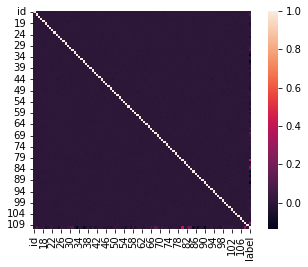

In [7]:
sns.heatmap(t.corr(), square=True) #Оставшиеся фичи почти не коррелируют коррелилруют между собой

/home/misha/anaconda3/envs/share/lib/python3.8/site-packages/seaborn/axisgrid.py:1242: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


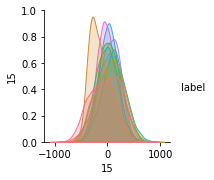

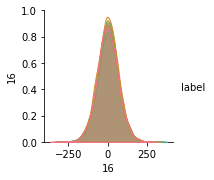

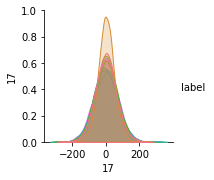

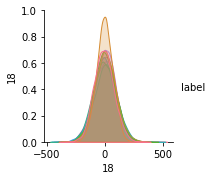

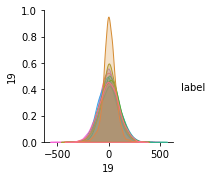

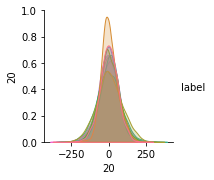

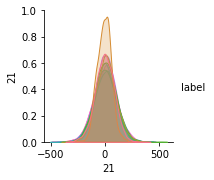

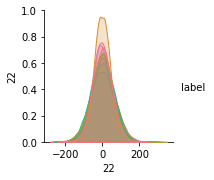

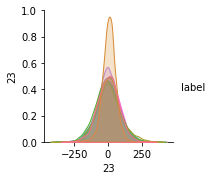

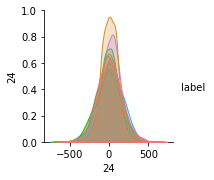

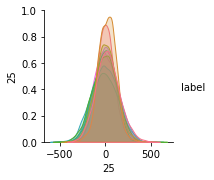

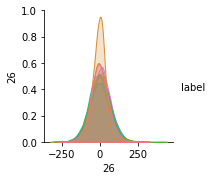

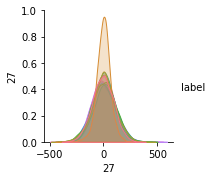

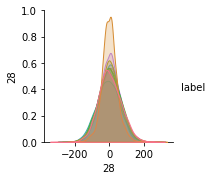

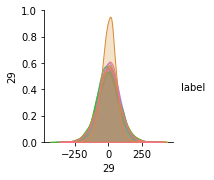

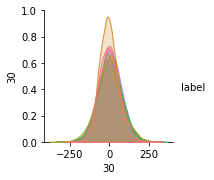

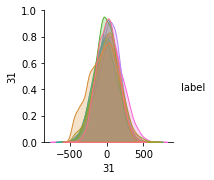

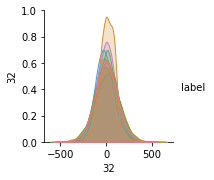

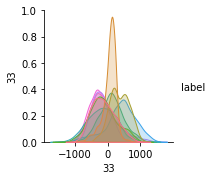

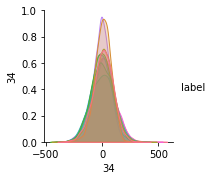

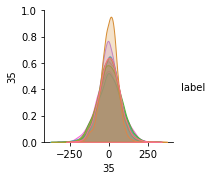

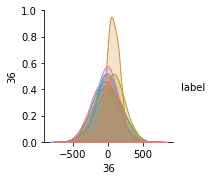

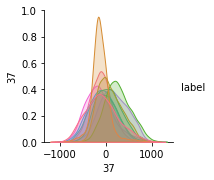

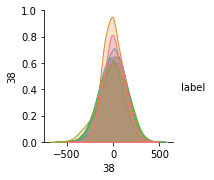

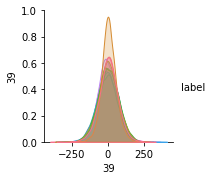

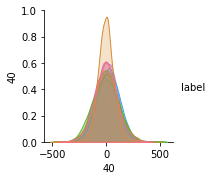

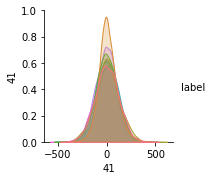

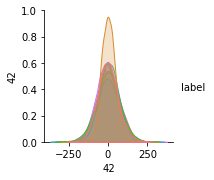

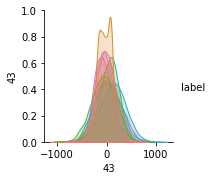

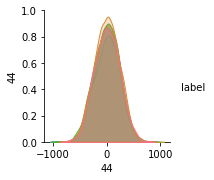

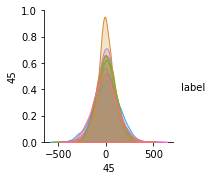

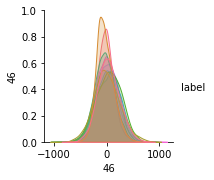

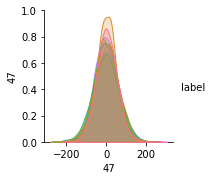

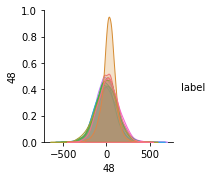

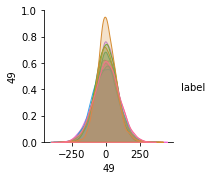

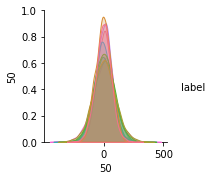

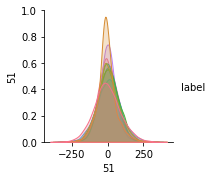

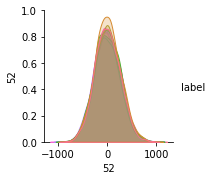

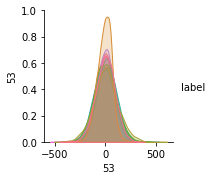

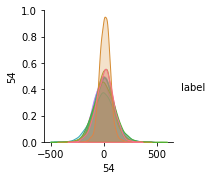

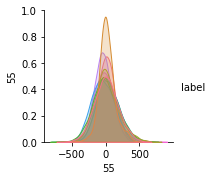

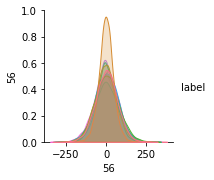

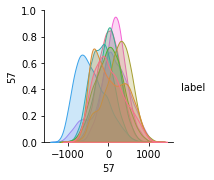

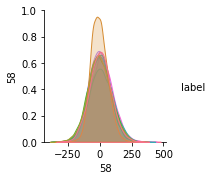

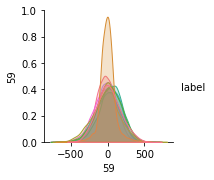

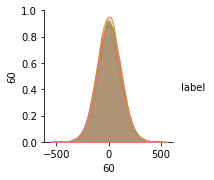

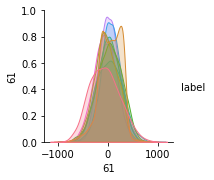

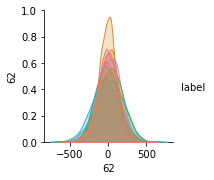

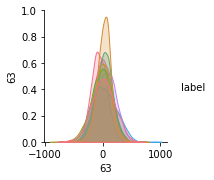

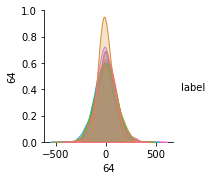

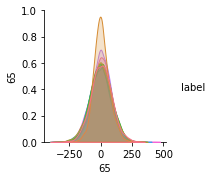

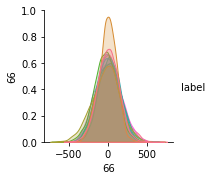

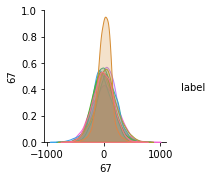

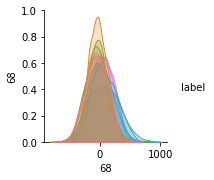

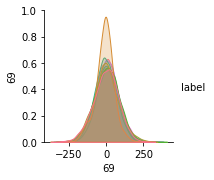

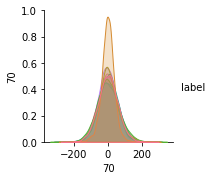

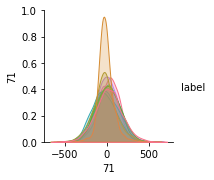

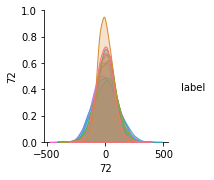

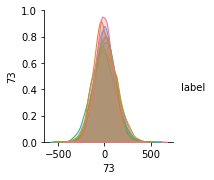

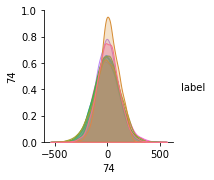

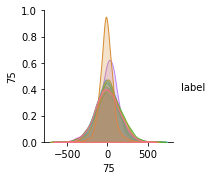

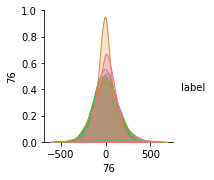

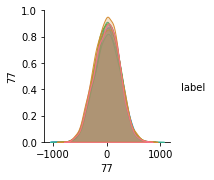

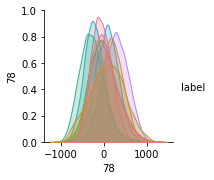

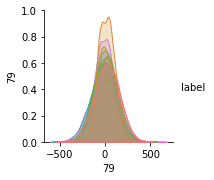

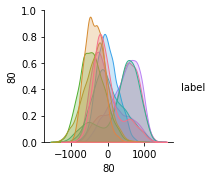

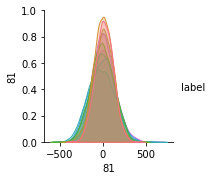

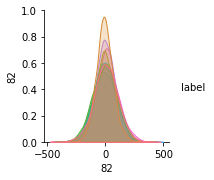

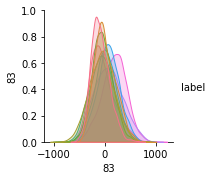

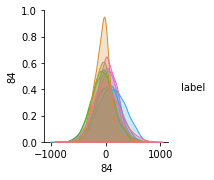

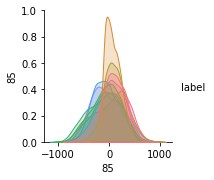

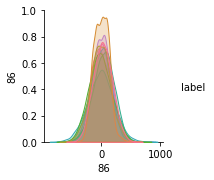

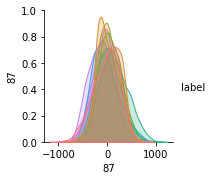

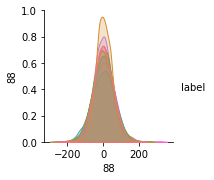

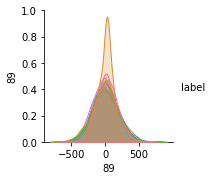

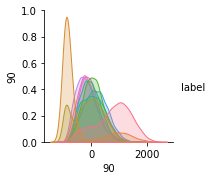

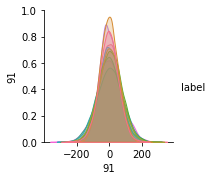

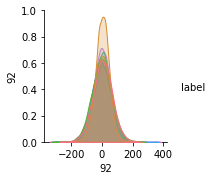

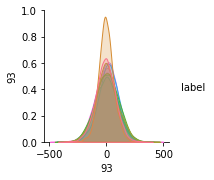

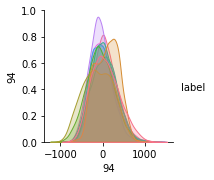

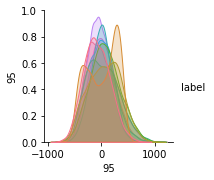

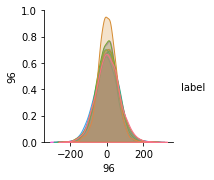

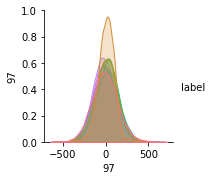

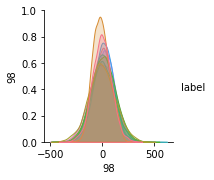

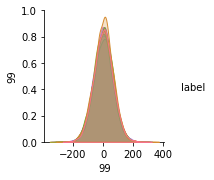

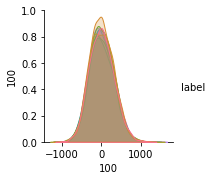

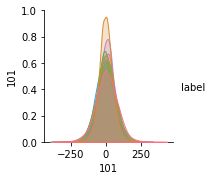

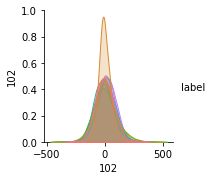

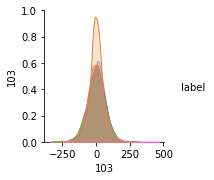

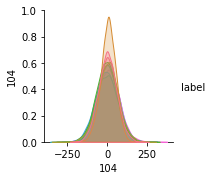

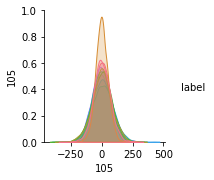

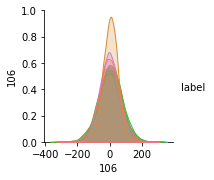

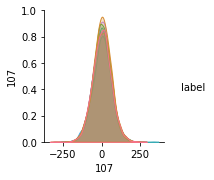

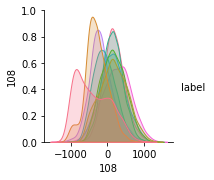

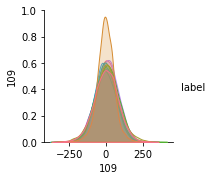

In [6]:
for i in range(15, 110, 1):
    sns.pairplot(t[[f'{i}'] + ['label']], hue = "label", palette="husl")

In [23]:
# можно выкинуть следующие фичи, так как их распределения по label не различаются практически
# то есть они не дают вклада в классификации
drop_column = ['16', '44', '52', '60', '77', '99', '100', '107']
t.drop(drop_column, axis=1, inplace=True)
t

,id,15,17,18,19,20,21,22,23,24,...,98,101,102,103,104,105,106,108,109,label
0,0,-248.259157,-40.154632,-6.528808,-176.749531,61.872700,-89.548161,32.414852,-140.231821,101.054761,...,59.297607,-61.486539,-62.615526,-67.840895,23.592680,124.809538,-23.077201,158.660385,-83.848561,0
1,1,-27.943592,22.318301,38.162048,53.924961,50.527587,-22.346857,11.142822,-98.734174,-204.123448,...,116.435131,44.274265,30.681210,34.671579,66.111775,-63.125159,-43.477966,40.601941,-36.462574,5
2,2,-73.804245,49.403011,115.668719,118.056089,126.248107,4.977037,-179.432432,17.780447,58.590776,...,15.221104,14.487393,-18.822421,-72.809791,-98.768014,7.588928,34.714429,-271.184273,63.889350,4
3,3,300.711854,15.767445,-108.766805,-94.224412,-57.808470,60.931524,3.001858,34.700231,-121.823804,...,68.706060,4.706411,1.643793,-15.398200,-14.028664,65.495963,-15.017345,-1214.900271,-25.435079,1
4,4,88.693241,61.902004,-131.111820,158.971805,5.079087,47.160977,10.568292,49.772049,-186.428904,...,-112.677494,-33.992316,137.368611,-33.962428,3.272204,93.822307,-168.784463,-80.756317,-51.105732,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,-251.334743,57.012744,-102.266434,49.636866,101.316239,-56.266170,-17.148591,42.095086,99.901763,...,32.736705,-43.625016,21.911974,-17.671641,-4.668959,-20.685668,40.392418,-613.365860,-14.639107,1
49996,49996,64.433863,-22.523504,130.660300,-28.491521,-67.199622,18.347502,-26.061013,10.062433,-113.871609,...,62.487247,-79.004341,21.264265,-223.536125,7.911069,-62.884677,-65.526847,-37.688094,100.178277,2
49997,49997,-22.190596,-78.790792,154.158769,-76.880282,53.915975,-198.293766,-0.831889,-29.573864,-36.381493,...,-65.302332,-48.363355,-66.722394,14.273012,97.246374,28.609078,-1.007960,-107.468733,111.955892,9
49998,49998,-369.036897,113.255666,-20.990421,49.794002,-4.884195,38.403649,-27.350879,-1.784994,-143.726745,...,-153.051071,-52.548998,9.162448,-24.228557,67.419780,-82.239763,40.118054,482.508831,-74.909144,3


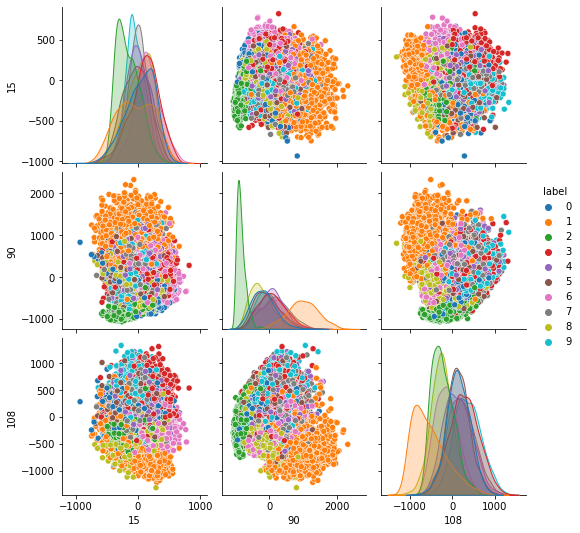

In [3]:
# Теперь посмотрим почему так плохо учится модель на первых 10к и хорошо на последних 40к
# Возьмем фичи в которых все хорошо распределено (не сливается в одном распределении)
sns.pairplot(t.loc[:10_000, ['15', '90', '108', 'label']], 
             hue = "label", palette='tab10')

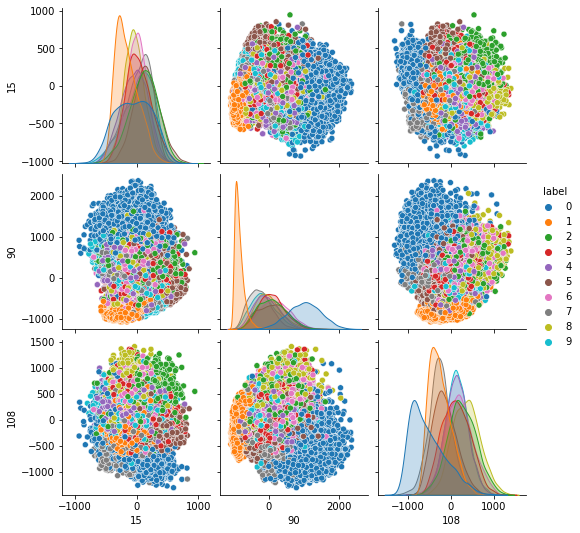

In [4]:
sns.pairplot(t.loc[10_000:, ['15', '90', '108', 'label']], 
             hue = "label", palette='tab10')

### Видно соответсвие:
 0 1 2 3 4 5 6 7 8 9 (:10_000)


 _ 0 1 2 _ _ 5 _ 7 8 (10_000:)
### Гипотеза: 
кто то перемешал метки в первых 10к, чтобы вернуть их на место нужно сделать циклический сдвиг меток на 9 по модулю 10

In [82]:
t.loc[:10_000, 'label'] = (t.loc[:10_000,'label']+9)%10

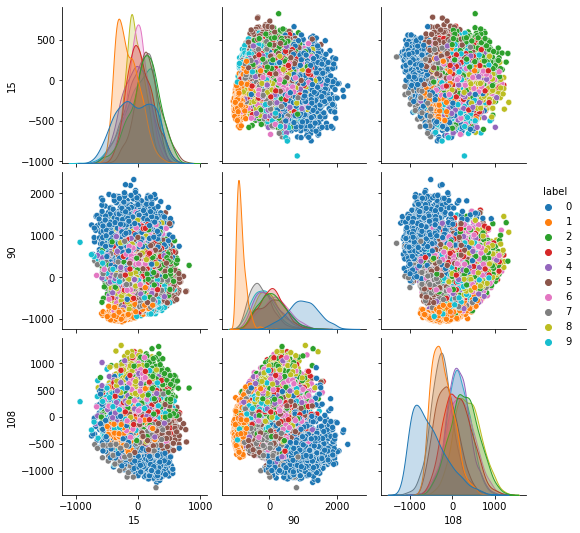

In [83]:
sns.pairplot(t.loc[:10_000, ['15', '90', '108', 'label']], 
             hue = "label", palette='tab10')

Ура, мы увеличили размер обучающей выборки!


Посмотрим как учится алгоритм

In [85]:
X_res = np.array(t.loc[:, '15':'109'])
y_res = np.array(t.loc[:, 'label'])
result = []
param_grid = {'n_neighbors': list(range(1, 22, 3)), 'p': [1, 2], 'weights': ['uniform', 'distance']}
for params in tqdm(ParameterGrid(param_grid)):
    scores = cross_val_score(
        KNeighborsClassifier(**params, n_jobs=-1), X_res, y_res, cv=5)
    result.append([params, scores.mean()])
    print(params, scores, scores.mean())

  4%|█▍                                       | 1/28 [03:29<1:34:17, 209.53s/it]

{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'} [0.9682 0.9679 0.9686 0.968  0.9663] 0.9678000000000001


  7%|██▉                                      | 2/28 [06:47<1:27:51, 202.77s/it]

{'n_neighbors': 1, 'p': 1, 'weights': 'distance'} [0.9682 0.9679 0.9686 0.968  0.9663] 0.9678000000000001


 11%|████▍                                    | 3/28 [08:18<1:03:10, 151.64s/it]

{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'} [0.97   0.9725 0.9723 0.9713 0.9712] 0.9714599999999999


 14%|██████▏                                    | 4/28 [09:44<50:22, 125.94s/it]

{'n_neighbors': 1, 'p': 2, 'weights': 'distance'} [0.97   0.9725 0.9723 0.9713 0.9712] 0.9714599999999999


 18%|███████▎                                 | 5/28 [13:35<1:02:44, 163.67s/it]

{'n_neighbors': 4, 'p': 1, 'weights': 'uniform'} [0.9636 0.9648 0.966  0.9643 0.9648] 0.9647


 21%|████████▊                                | 6/28 [17:26<1:08:23, 186.50s/it]

{'n_neighbors': 4, 'p': 1, 'weights': 'distance'} [0.969  0.9704 0.9706 0.9684 0.9678] 0.9692399999999999


 25%|██████████▊                                | 7/28 [19:31<58:12, 166.31s/it]

{'n_neighbors': 4, 'p': 2, 'weights': 'uniform'} [0.9708 0.97   0.9698 0.9692 0.9712] 0.9701999999999998


 29%|████████████▎                              | 8/28 [21:31<50:32, 151.64s/it]

{'n_neighbors': 4, 'p': 2, 'weights': 'distance'} [0.9736 0.9757 0.9738 0.9742 0.9752] 0.9744999999999999


 32%|█████████████▊                             | 9/28 [25:17<55:25, 175.03s/it]

{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'} [0.9616 0.9622 0.965  0.9634 0.9624] 0.9629199999999999


 36%|███████████████                           | 10/28 [29:03<57:14, 190.82s/it]

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'} [0.9642 0.9641 0.9666 0.9644 0.9641] 0.9646799999999999


 39%|████████████████▌                         | 11/28 [31:03<47:54, 169.08s/it]

{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'} [0.9687 0.9684 0.9695 0.9678 0.97  ] 0.9688800000000001


 43%|██████████████████                        | 12/28 [32:59<40:45, 152.82s/it]

{'n_neighbors': 7, 'p': 2, 'weights': 'distance'} [0.9694 0.9696 0.9707 0.969  0.9726] 0.97026


 46%|███████████████████▌                      | 13/28 [36:42<43:33, 174.20s/it]

{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'} [0.9578 0.9587 0.9615 0.9577 0.9608] 0.9593


 50%|█████████████████████                     | 14/28 [40:20<43:41, 187.27s/it]

{'n_neighbors': 10, 'p': 1, 'weights': 'distance'} [0.961  0.9628 0.9638 0.9611 0.963 ] 0.96234


 54%|██████████████████████▌                   | 15/28 [42:19<36:07, 166.75s/it]

{'n_neighbors': 10, 'p': 2, 'weights': 'uniform'} [0.9648 0.9668 0.9665 0.9655 0.968 ] 0.96632


 57%|████████████████████████                  | 16/28 [44:15<30:17, 151.43s/it]

{'n_neighbors': 10, 'p': 2, 'weights': 'distance'} [0.9682 0.9692 0.9682 0.9678 0.9698] 0.96864


 61%|█████████████████████████▍                | 17/28 [47:56<31:36, 172.38s/it]

{'n_neighbors': 13, 'p': 1, 'weights': 'uniform'} [0.9564 0.958  0.9581 0.9564 0.9585] 0.95748


 64%|███████████████████████████               | 18/28 [51:34<31:02, 186.22s/it]

{'n_neighbors': 13, 'p': 1, 'weights': 'distance'} [0.9581 0.9592 0.9599 0.9575 0.9603] 0.959


 68%|████████████████████████████▌             | 19/28 [53:34<24:55, 166.20s/it]

{'n_neighbors': 13, 'p': 2, 'weights': 'uniform'} [0.9629 0.9652 0.9654 0.9627 0.9655] 0.96434


 71%|██████████████████████████████            | 20/28 [55:29<20:08, 151.02s/it]

{'n_neighbors': 13, 'p': 2, 'weights': 'distance'} [0.9638 0.9666 0.9666 0.9644 0.9671] 0.9657


 75%|███████████████████████████████▌          | 21/28 [59:11<20:04, 172.09s/it]

{'n_neighbors': 16, 'p': 1, 'weights': 'uniform'} [0.9548 0.9549 0.9556 0.9549 0.9563] 0.9552999999999999


 79%|███████████████████████████████▍        | 22/28 [1:02:49<18:36, 186.06s/it]

{'n_neighbors': 16, 'p': 1, 'weights': 'distance'} [0.9568 0.958  0.9581 0.9559 0.9584] 0.9574400000000001


 82%|████████████████████████████████▊       | 23/28 [1:04:49<13:50, 166.04s/it]

{'n_neighbors': 16, 'p': 2, 'weights': 'uniform'} [0.96   0.963  0.9653 0.9621 0.9631] 0.9627000000000001


 86%|██████████████████████████████████▎     | 24/28 [1:06:45<10:03, 150.98s/it]

{'n_neighbors': 16, 'p': 2, 'weights': 'distance'} [0.9628 0.965  0.9665 0.9638 0.9651] 0.9646399999999999


 89%|███████████████████████████████████▋    | 25/28 [1:10:28<08:37, 172.66s/it]

{'n_neighbors': 19, 'p': 1, 'weights': 'uniform'} [0.9511 0.9523 0.9526 0.9527 0.9548] 0.9526999999999999


 93%|█████████████████████████████████████▏  | 26/28 [1:14:06<06:12, 186.26s/it]

{'n_neighbors': 19, 'p': 1, 'weights': 'distance'} [0.9526 0.9544 0.954  0.9543 0.9569] 0.95444


 96%|██████████████████████████████████████▌ | 27/28 [1:16:06<02:46, 166.33s/it]

{'n_neighbors': 19, 'p': 2, 'weights': 'uniform'} [0.958  0.9622 0.9624 0.9599 0.9624] 0.96098


100%|████████████████████████████████████████| 28/28 [1:18:01<00:00, 167.20s/it]

{'n_neighbors': 19, 'p': 2, 'weights': 'distance'} [0.9586 0.9632 0.9642 0.9618 0.9637] 0.9623000000000002


### best params {'n_neighbors': 4, 'p': 2, 'weights': 'distance'} 
public score 0.9758

Если не дробать шумные фичи то будет 0.9702 

### KNN и все-все-все
В предпоследний день соревнования мне показали что это не лучший скор и я решил попробовать ансамбли в надежде на лучший результат

Модели те, которые первыми пришли в голову, в принципе этого хватило для 1го места

In [1]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, train_test_split

import xgboost as xgb
import pandas as pd
import numpy as np

t = pd.read_csv('train.csv')
for ind, i in enumerate(t.isnull().max(axis=0)):
    for i in t.keys()[t.isnull().max(axis=0)]:
        t = t.drop(i, axis=1)
t.loc[:10_000, ['label']] = (t.loc[:10_000, ['label']] + 9)%10
drop_column = ['16', '44', '52', '60', '77', '99', '100', '107']
t.drop(drop_column, axis=1, inplace=True)
data = t.loc[:, '15':'109']
target = t['label']

X_train, X_valid, y_train, y_valid = train_test_split(data, target, test_size=0.8, random_state=12)
group_kf = StratifiedKFold(n_splits=3)

### Random Forest

In [3]:
params_rf = {'n_estimators' : [200],
             'max_features' : ["sqrt", "log2"],
             'max_samples' : [0.5, 0.8, 1]
             }

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid=params_rf, cv=group_kf, scoring='accuracy', 
                              n_jobs=10, verbose=10)
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_score_, grid_search_rf.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


(0.9096998782061769,
 {'max_features': 'sqrt', 'max_samples': 0.8, 'n_estimators': 200})

### Logistic Regression

In [4]:
params_lr = {'C' : [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'liblinear'], 'penalty':['l1', 'l2']}
grid_search_log = GridSearchCV(LogisticRegression(), param_grid=params_lr, cv=group_kf, 
                               scoring='accuracy', n_jobs=10, verbose=10)
grid_search_log.fit(X_train, y_train)
grid_search_log.best_score_, grid_search_log.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


F:\anaconda\envs\share\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "F:\anaconda\envs\share\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\anaconda\envs\share\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "F:\anaconda\envs\share\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: 

(0.8818991977182122, {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'})

### SVM

In [9]:
params_svm = {'C':[0.01, 1, 100], 'degree' :[3, 5], 'kernel':['rbf', 'poly']}
grid_search_svm = GridSearchCV(SVC(), param_grid=params_svm,
                               cv=group_kf, scoring='accuracy', n_jobs=10, verbose=10)
grid_search_svm.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=10,
             param_grid={'C': [0.01, 1, 100], 'degree': [3, 5],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=10)

In [11]:
grid_search_svm.best_params_, grid_search_svm.best_score_

({'C': 100, 'degree': 3, 'kernel': 'poly'}, 0.9608997492430706)

Перед отправкой недосчитал, брал случайный {C=1, kernel='rbf',  solver='liblinear'}

### Gradient Boosting

In [16]:
from sklearn.model_selection import RandomizedSearchCV
params_gb =  {'alpha': [0.01, 0.1, 1],
              'colsample_bytree': [0.5, 0.7, 1],
              'eta': [0.01, 0.1, 1],
              'max_depth': [3, 4, 6],
              'gamma' : [0, 1, 10],
               'n_estimators' : [100, 200, 300],
               'subsample': [0.5, 0.7, 1]}
grid_search_gb = RandomizedSearchCV(xgb.XGBClassifier(n_jobs=1), param_distributions=params_gb,
                                    n_iter=10, cv=group_kf, scoring='accuracy', n_jobs=10, verbose=10)
grid_search_gb.fit(X_train, y_train)
grid_search_gb.best_score_, grid_search_gb.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


F:\anaconda\envs\share\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:00:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.9209997784421513,
 {'subsample': 0.7,
  'n_estimators': 300,
  'max_depth': 4,
  'gamma': 0,
  'eta': 0.1,
  'colsample_bytree': 0.7,
  'alpha': 1})

### Ensemble

In [ ]:
grid_search_gb_best_params_ =  {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 4, 'gamma': 0, 'eta': 0.1,
                                'colsample_bytree': 0.7, 'alpha': 1}
estimators = [('log', LogisticRegression(C=1, penalty='l1', solver='liblinear')), 
              
              ('r_forest', RandomForestClassifier(n_estimators=1000, min_samples_split=5, min_samples_leaf=5,
                                                  max_samples = 0.8, max_features = 'log2')),
              
              ('xgb', xgb.XGBClassifier(**grid_search_gb_best_params_)),
              
              ('knn', KNeighborsClassifier(n_neighbors=4, weights='distance')),
              
              ('svm', SVC(C=100, kernel='poly', degree=3)) 
             ]
stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), 
                                 cv=5, stack_method='auto', verbose=10, n_jobs=10)
stack_model.fit(data, target)

### Вывод данных

In [ ]:
test = pd.read_csv('test.csv')
drop_column = ['16', '44', '52', '60', '77', '99', '100', '107']
test.drop(drop_column, axis=1, inplace=True)
test = test.loc[:, '15':'109']
res = stack_model.predict(test)
df = pd.DataFrame(res)
df = df.rename(columns = {0:'label'})
df = df.reset_index()
df = df.rename(columns = {'index':'id'})
df.to_csv('Gvozdev_Mikhail.csv', index=False)

public score 0.9798        было 0.9758                     

private score 0.9792 

## Вывод
Все танцы с бубнами вокруг стекинга дали увеличение на 0.4% или на 4 тысячных, при этом в разы увеличил время работы. 

Как показали расчеты выше кнн все таки лучшая модель. 

Если не критичен проигрыш в точности на 0.4% и при этом важна скорость работы, то я бы оставил только кнн.